In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def add_layer(inputs, in_size, out_size, activation_function=None):
    Weights = tf.Variable(tf.random_normal([in_size,out_size]))  
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)  #biases的推荐值不为0，所以我们这里是在0向量的基础上又加了0.1。
    Wx_plus_b = tf.matmul(inputs, Weights) + biases  #神经网络未激活的值  tf.matmul()是矩阵的乘法
    
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
        
    return outputs

### 导入数据

In [8]:
x_data = np.linspace(-1,1,300,dtype=np.float32)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape).astype(np.float32)
y_data = np.square(x_data) - 0.5 + noise

xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])

### 搭建网络

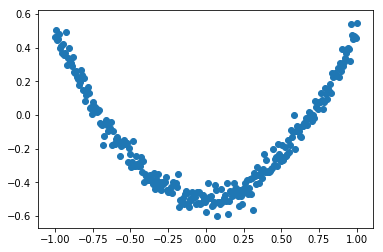

In [30]:
from time import sleep
#隐藏层
l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)

# 输出层
prediction = add_layer(l1, 10, 1, activation_function=None)

#计算误差
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction),reduction_indices=[1]))
# 计算准确度
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(x_data, y_data)
    plt.ion()
    plt.show()
    for i in range(1000):
        #traning
        sess.run(train_step,feed_dict={xs:x_data,ys:y_data})
        if i%50 == 0:
            try:
                ax.lines.remove(lines[0])
            except Exception:
                pass
            prediction_value = sess.run(prediction, feed_dict={xs: x_data})
            